In [1]:
import polars as pl
import matplotlib.pyplot as plt
import seaborn as sns

# Import data from Paolo Coletti Github


In [12]:
BASE_URL = "https://raw.githubusercontent.com/paolocole/Stock-Indexes-Historical-Data/main/DAILY/NET/EUR/"
indexes = (
    pl.read_excel(
        "https://www.paolocoletti.com/wp-content/uploads/youtube/etfs_with_msci.xlsx",
        sheet_name="selezionati",
    )
    .with_columns(
        url=(
            pl.lit(BASE_URL)
            + pl.col("Path").str.replace_all(r"\\", "/")
            + "/"
            + pl.col("File")
            + ".csv"
        )
    )
    .select(["MSCI index", "url"])
)
indexes

MSCI index,url
str,str
"""WORLD""","""https://raw.githubusercontent.com/paolocole/Stock-Indexes-Historical-Data/main/DAILY/NET/EUR/DEVELOPED-MARKETS-DM/Region/NONE/NONE/STANDARD-LARGE-MID-CAP/WORLD.csv"""
"""EMERGING MARKETS IMI""","""https://raw.githubusercontent.com/paolocole/Stock-Indexes-Historical-Data/main/DAILY/NET/EUR/EMERGING-MARKETS-EM/Region/NONE/NONE/IMI-LARGE-MID-SMALL-CAP/EM-EMERGING-MARKETS-IMI.csv"""
"""ACWI""","""https://raw.githubusercontent.com/paolocole/Stock-Indexes-Historical-Data/main/DAILY/NET/EUR/ALL-COUNTRY-DM-EM/Region/NONE/NONE/STANDARD-LARGE-MID-CAP/ACWI.csv"""
"""EUROPE""","""https://raw.githubusercontent.com/paolocole/Stock-Indexes-Historical-Data/main/DAILY/NET/EUR/DEVELOPED-MARKETS-DM/Region/NONE/NONE/STANDARD-LARGE-MID-CAP/EUROPE.csv"""
"""USA""","""https://raw.githubusercontent.com/paolocole/Stock-Indexes-Historical-Data/main/DAILY/NET/EUR/DEVELOPED-MARKETS-DM/Country/NONE/NONE/STANDARD-LARGE-MID-CAP/USA.csv"""
…,…
"""FRANCE""","""https://raw.githubusercontent.com/paolocole/Stock-Indexes-Historical-Data/main/DAILY/NET/EUR/DEVELOPED-MARKETS-DM/Country/NONE/NONE/STANDARD-LARGE-MID-CAP/FRANCE.csv"""
"""POLAND""","""https://raw.githubusercontent.com/paolocole/Stock-Indexes-Historical-Data/main/DAILY/NET/EUR/EMERGING-MARKETS-EM/Country/NONE/NONE/STANDARD-LARGE-MID-CAP/POLAND.csv"""
"""GREECE""","""https://raw.githubusercontent.com/paolocole/Stock-Indexes-Historical-Data/main/DAILY/NET/EUR/EMERGING-MARKETS-EM/Country/NONE/NONE/STANDARD-LARGE-MID-CAP/GREECE.csv"""


In [16]:
frames = [
    pl.read_csv(url, try_parse_dates=True)
    .rename({c: name for c in pl.read_csv(url, n_rows=1).columns if c != "Date"})
    for name, url in indexes.iter_rows()
]
prices = pl.concat(frames, how="align")
prices

CPU times: user 651 ms, sys: 460 ms, total: 1.11 s
Wall time: 1min 8s


Date,WORLD,EM (EMERGING MARKETS) IMI,ACWI,EUROPE,USA,EM (EMERGING MARKETS),JAPAN IMI,INDIA,WORLD SMALL CAP,EMU,JAPAN,CHINA,EM ASIA,PACIFIC ex JAPAN,BRAZIL,EUROPE SMALL CAP,CHINA A,EM (EMERGING MARKETS) ex CHINA,UNITED KINGDOM,WORLD ex USA,EUROPE ex UK,NORDIC COUNTRIES,CANADA,NORTH AMERICA,EMU SMALL CAP,AC FAR EAST ex JAPAN,WORLD ex EMU,WORLD ex EUROPE,TAIWAN,SAUDI ARABIA,EM LATIN AMERICA,MEXICO,AUSTRALIA,JAPAN SMALL CAP,SWITZERLAND,AC ASIA ex JAPAN,EM EASTERN EUROPE ex RUSSIA,KOREA,UNITED KINGDOM SMALL CAP,SINGAPORE,SOUTH AFRICA,FRANCE,POLAND,GREECE,INDONESIA,TURKEY
date,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
1998-12-31,null,306.018626,null,null,null,null,674.664782,null,null,null,null,null,null,null,null,null,null,1000.0,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
1999-01-01,null,306.02237,null,null,null,null,674.664782,null,null,null,null,null,null,null,null,null,null,1000.0,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
1999-01-04,null,308.160307,null,null,null,null,659.640939,null,null,null,null,null,null,null,null,null,null,1013.617578,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
1999-01-05,null,311.06609,null,null,null,null,656.914318,null,null,null,null,null,null,null,null,null,null,1025.086271,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
1999-01-06,null,319.74462,null,null,null,null,661.012292,null,null,null,null,null,null,null,null,null,null,1054.367098,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
2025-03-31,546.100301,2123.632113,391.071622,355.856948,679.897984,513.392816,2155.908944,1053.32212,591.982446,318.635749,290.22704,507.312505,602.239759,715.97932,440.580249,563.979518,2798.132844,7582.970684,311.159615,373.527664,374.700321,613.442642,822.918923,678.322768,523.773261,472.893191,586.891558,617.097679,628.851628,1837.19498,460.972465,544.48986,793.460288,310.813489,485.411562,511.833251,4400.045553,630.793694,408.063264,761.908566,548.291338,380.406946,230.22081,12.257103,1219.671816,176.546383
2025-04-01,548.82945,2140.03371,393.134058,359.614009,682.150593,517.330208,2160.786092,1037.971068,594.238067,322.714267,291.085808,510.192928,606.65527,726.113369,446.115479,569.51027,2793.74618,7648.005336,313.23016,377.011696,379.085913,620.117739,830.686424,680.741661,528.032979,479.122295,589.388291,619.496288,647.868103,1835.603639,467.628986,554.354288,807.852008,310.727235,489.513244,515.582744,4480.0304,642.377641,411.179126,762.456566,556.779499,384.532799,234.663445,12.408047,1218.712822,176.66703
2025-04-02,549.371437,2133.714627,393.352729,357.825523,684.100306,515.688391,2136.28269,1042.973791,597.322963,321.782874,288.037321,508.114514,605.49062,726.896947,443.853788,567.547527,2782.808175,7626.860032,311.983073,375.581817,377.090692,615.088224,838.527667,682.873281,525.725896,477.377693,590.189704,620.850564,645.92999,1827.752933,466.511854,556.362482,809.784253,306.218123,483.870227,514.604647,4507.084184,638.144868,410.808599,759.772202,538.136384,383.666279,236.78724,12.530857,1213.549022,173.490579


## Transforming Data in percentage change


In [19]:
changes = (
    prices.lazy()
    .with_columns(
        *(pl.col(col).pct_change().alias(col) for col in prices.columns if col != "Date")
    )
    .collect()
)
changes

Date,WORLD,EM (EMERGING MARKETS) IMI,ACWI,EUROPE,USA,EM (EMERGING MARKETS),JAPAN IMI,INDIA,WORLD SMALL CAP,EMU,JAPAN,CHINA,EM ASIA,PACIFIC ex JAPAN,BRAZIL,EUROPE SMALL CAP,CHINA A,EM (EMERGING MARKETS) ex CHINA,UNITED KINGDOM,WORLD ex USA,EUROPE ex UK,NORDIC COUNTRIES,CANADA,NORTH AMERICA,EMU SMALL CAP,AC FAR EAST ex JAPAN,WORLD ex EMU,WORLD ex EUROPE,TAIWAN,SAUDI ARABIA,EM LATIN AMERICA,MEXICO,AUSTRALIA,JAPAN SMALL CAP,SWITZERLAND,AC ASIA ex JAPAN,EM EASTERN EUROPE ex RUSSIA,KOREA,UNITED KINGDOM SMALL CAP,SINGAPORE,SOUTH AFRICA,FRANCE,POLAND,GREECE,INDONESIA,TURKEY
date,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
1998-12-31,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
1999-01-01,null,0.000012,null,null,null,null,0.0,null,null,null,null,null,null,null,null,null,null,0.0,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
1999-01-04,null,0.006986,null,null,null,null,-0.022269,null,null,null,null,null,null,null,null,null,null,0.013618,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
1999-01-05,null,0.009429,null,null,null,null,-0.004133,null,null,null,null,null,null,null,null,null,null,0.011315,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
1999-01-06,null,0.027899,null,null,null,null,0.006238,null,null,null,null,null,null,null,null,null,null,0.028564,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
2025-03-31,0.000365,-0.015436,-0.001279,-0.014597,0.007048,-0.015315,-0.029141,0.001944,-0.007366,-0.015081,-0.03143,-0.013147,-0.017805,-0.018134,-0.004446,-0.019756,-0.004987,-0.016299,-0.008884,-0.016412,-0.016262,-0.016651,0.001959,0.006837,-0.019742,-0.021616,0.001862,0.003409,-0.041903,0.001917,-0.006933,-0.013452,-0.025056,-0.020705,-0.019965,-0.016744,-0.021653,-0.035655,-0.02186,-0.000506,-0.00475,-0.015867,-0.02345,-0.041512,0.001944,0.003145
2025-04-01,0.004998,0.007723,0.005274,0.010558,0.003313,0.007669,0.002262,-0.014574,0.00381,0.0128,0.002959,0.005678,0.007332,0.014154,0.012563,0.009807,-0.001568,0.008576,0.006654,0.009327,0.011704,0.010881,0.009439,0.003566,0.008133,0.013172,0.004254,0.003887,0.03024,-0.000866,0.01444,0.018117,0.018138,-0.000278,0.00845,0.007326,0.018178,0.018364,0.007636,0.000719,0.015481,0.010846,0.019297,0.012315,-0.000786,0.000683
2025-04-02,0.000988,-0.002953,0.000556,-0.004973,0.002858,-0.003174,-0.01134,0.00482,0.005191,-0.002886,-0.010473,-0.004074,-0.00192,0.001079,-0.00507,-0.003446,-0.003915,-0.002765,-0.003981,-0.003793,-0.005263,-0.008111,0.009439,0.003131,-0.004369,-0.003641,0.00136,0.002186,-0.002992,-0.004277,-0.002389,0.003623,0.002392,-0.014511,-0.011528,-0.001897,0.006039,-0.006589,-0.000901,-0.003521,-0.033484,-0.002253,0.00905,0.009898,-0.004237,-0.01798


# Correlations of Returns Visualization


In [ ]:
corr = changes.drop("Date").to_pandas().corr()
plt.figure(figsize=(20, 15))
sns.heatmap(
    round(corr * 100, 0),
    cmap="Reds",
    linewidths=0.1,
    annot=True,
    fmt=".0f",
    vmin=0,
    vmax=100,
    annot_kws={"size": 7},
)

In [21]:
redundant = [
    "ACWI",
    "USA",
    "NORTH AMERICA",
    "WORLD ex EMU",
    "WORLD ex EUROPE",
    "EM (EMERGING MARKETS)",
    "EM ASIA",
    "AC FAR EAST ex JAPAN",
    "AC ASIA ex JAPAN",
    "EMU",
    "WORLD ex USA",
    "EUROPE ex UK",
    "FRANCE",
    "JAPAN",
    "EM (EMERGING MARKETS) ex CHINA",
    "EM LATIN AMERICA",
    "EMU SMALL CAP",
    "AUSTRALIA",
    "UNITED KINGDOM SMALL CAP",
]
changes = changes.drop(redundant)
prices = prices.drop(redundant)

<Axes: >

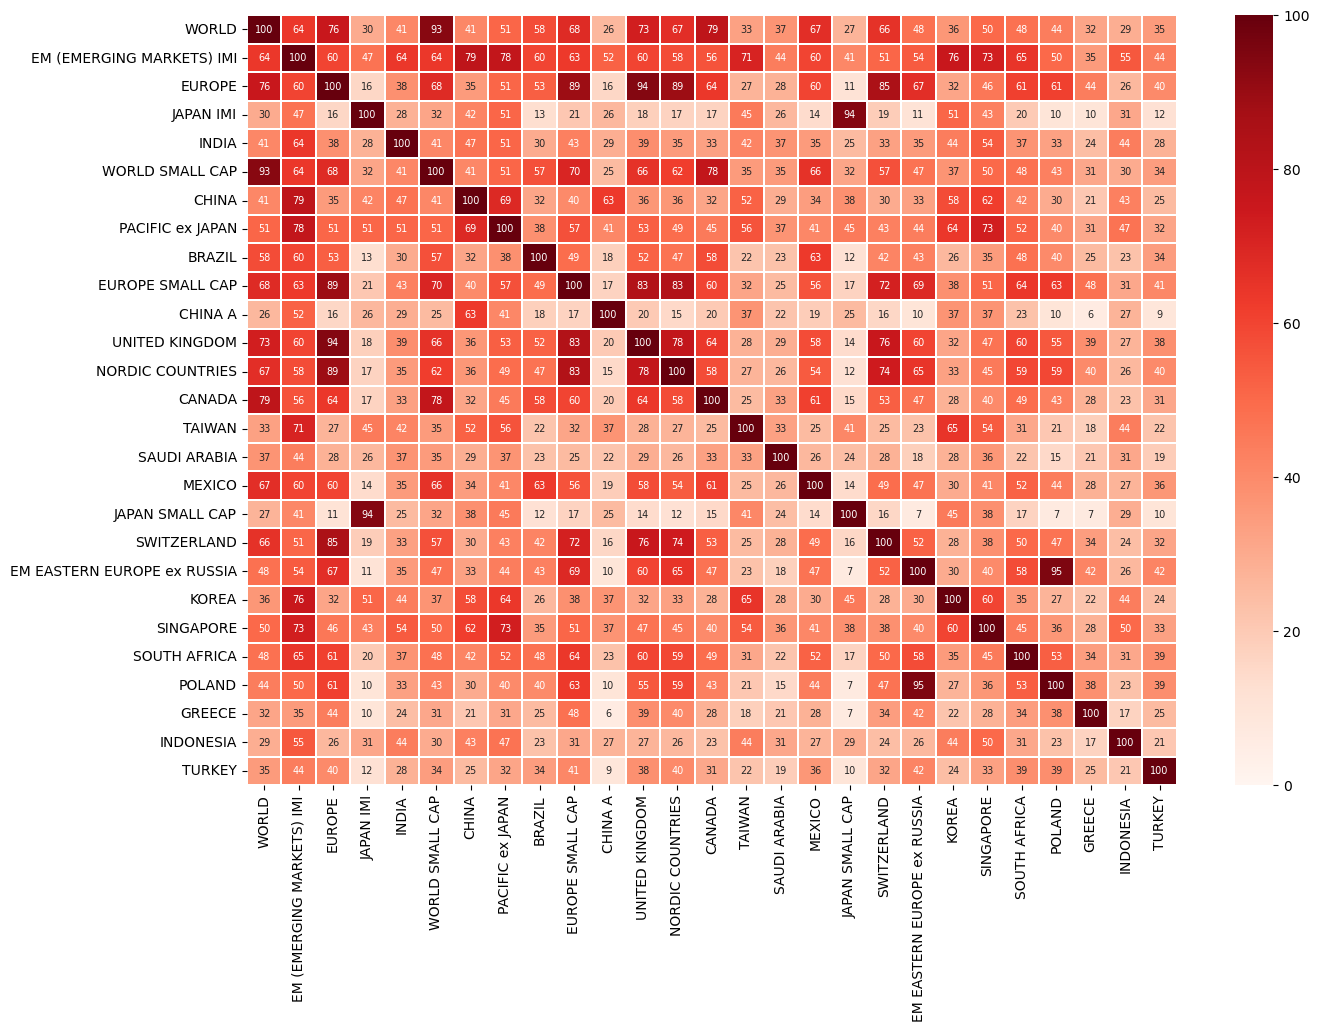

In [22]:
corr = changes.drop("Date").to_pandas().corr() * 100
plt.figure(figsize=(15, 10))
sns.heatmap(
    corr.round(0),
    cmap="Reds",
    linewidths=0.1,
    annot=True,
    fmt=".0f",
    vmin=0,
    vmax=100,
    annot_kws={"size": 7},
)

# Optmization


## Rebalancing

In [ ]:
import polars as pl

pl.Config(tbl_cols=-1, tbl_rows=10)

def calculate_commission(value: float) -> float:
    """
    Calculates the trading commission based on a tiered structure.

    Args:
        value: The total value of the transaction.

    Returns:
        The calculated commission fee.
    """
    FEE_MIN = 5.0
    FEE_MAX = 25.0
    FEE_RATE = 0.0018
    return max(FEE_MIN, min(FEE_RATE * value, FEE_MAX))


class PortfolioManager:
    """
    Manages and rebalances a financial portfolio using Polars.
    """

    def __init__(
        self, portfolio_df: pl.DataFrame, verbose=False, tax_rate: float = 0.26
    ):
        """
        Initializes the PortfolioManager.

        Args:
            portfolio_df: A Polars DataFrame with the initial portfolio state.
                          Required columns: ["index", "quantity", "avg_price", "price", "target_pct"]
            tax_rate: The capital gains tax rate.
        """
        self.portfolio = portfolio_df
        self.tax_rate = tax_rate
        self.verbose = verbose
        self._update_metrics()

    def _update_metrics(self):
        """
        Recalculates key portfolio metrics like current value, percentage allocations,
        and performance. This should be called after any transaction.
        """
        self.portfolio = self.portfolio.with_columns(
            (pl.col("quantity") * pl.col("price")).alias("current_value")
        )

        total_value = self.portfolio["current_value"].sum()

        self.portfolio = self.portfolio.with_columns(
            (pl.col("current_value") / total_value).alias("pct"),
            (pl.col("price") / pl.col("avg_price") - 1).alias("perf"),
        )

    def _execute_sell(self, asset: str, sell_quantity: int):
        """A helper function to execute a sell transaction for an integer quantity."""
        if sell_quantity <= 0:
            return

        # Get current asset data
        asset_row = self.portfolio.filter(pl.col("index") == asset)
        old_avg = asset_row["avg_price"][0]
        price = asset_row["price"][0]

        # Calculate sale proceeds
        sale_value = sell_quantity * price
        fee = calculate_commission(sale_value)

        # Calculate profit and apply tax
        profit = (price - old_avg) * sell_quantity
        tax_on_profit = max(0, profit * self.tax_rate)
        if self.verbose:
            print(f"Lost to taxes: {tax_on_profit:.2f}")

        net_cash_increase = sale_value - fee - tax_on_profit

        # Update portfolio DataFrame
        self.portfolio = self.portfolio.with_columns(
            # Decrease quantity of the sold asset
            pl.when(pl.col("index") == asset)
            .then(pl.col("quantity") - sell_quantity)
            .otherwise(pl.col("quantity"))
            .alias("quantity")
        ).with_columns(
            # Increase cash quantity
            pl.when(pl.col("index") == "CASH")
            .then(pl.col("quantity") + net_cash_increase)
            .otherwise(pl.col("quantity"))
            .alias("quantity")
        )
        if self.verbose:
            print(f"Sold: {sell_quantity} of {asset} for €{sale_value:,.2f}")

    def _execute_buy(self, asset: str, buy_quantity: int):
        """A helper function to execute a buy transaction for an integer quantity."""
        if buy_quantity <= 0:
            return

        # Get current asset and cash data
        asset_row = self.portfolio.filter(pl.col("index") == asset)
        old_qty = asset_row["quantity"][0]
        old_avg = asset_row["avg_price"][0]
        price = asset_row["price"][0]
        cash_available = self.portfolio.filter(pl.col("index") == "CASH")["quantity"][0]

        # Calculate cost
        cost = buy_quantity * price
        fee = calculate_commission(cost)
        total_cost = cost + fee

        if total_cost > cash_available and self.verbose:
            print(
                f"Insufficient cash to buy {asset}. Needed: ${total_cost:,.2f}, Available: €{cash_available:,.2f}"
            )
            return

        # Calculate new average price after the buy
        new_avg_price = ((old_qty * old_avg) + cost) / (old_qty + buy_quantity)

        # Update portfolio DataFrame
        self.portfolio = self.portfolio.with_columns(
            pl.when(pl.col("index") == asset)
            .then(pl.col("quantity") + buy_quantity)
            .when(pl.col("index") == "CASH")
            .then(pl.col("quantity") - total_cost)
            .otherwise(pl.col("quantity"))
            .alias("quantity"),
            pl.when(pl.col("index") == asset)
            .then(new_avg_price)
            .otherwise(pl.col("avg_price"))
            .alias("avg_price"),
        )
        
        if self.verbose:
            print(f"Bought: {buy_quantity} of {asset} for €{cost:,.2f}")

    def rebalance(self, trade_threshold: float = 1000.0):
        """
        Continuously rebalances the portfolio by selling overweight assets and
        buying underweight assets until it aligns with target percentages.

        Args:
            trade_threshold: The minimum value of a trade to execute, to avoid
                             very small, inefficient transactions.
        """
        max_iterations = 10  # Safety break to prevent infinite loops
        for _ in range(max_iterations):
            # Ensure metrics are up-to-date before making decisions
            self._update_metrics()

            total_value = self.portfolio["current_value"].sum()
            cash_available = self.portfolio.filter(pl.col("index") == "CASH")[
                "quantity"
            ][0]

            # Calculate the difference from target allocation
            self.portfolio = self.portfolio.with_columns(
                ((pl.col("target_pct") - pl.col("pct")) * total_value).alias(
                    "delta_value"
                )
            )

            # Exclude CASH from rebalancing candidates
            trade_candidates = self.portfolio.filter(pl.col("index") != "CASH")

            # --- SELL LOGIC ---
            most_overweight = trade_candidates.sort("delta_value").row(0, named=True)

            if most_overweight and most_overweight["delta_value"] < -trade_threshold:
                asset_to_sell = most_overweight["index"]
                sell_value = abs(most_overweight["delta_value"])
                # Ensure we only sell integer quantities
                sell_quantity = int(sell_value / most_overweight["price"])
                self._execute_sell(asset_to_sell, sell_quantity)
                continue  # Restart loop to re-evaluate after the trade

            # --- BUY LOGIC ---
            most_underweight = trade_candidates.sort(
                "delta_value", descending=True
            ).row(0, named=True)

            if most_underweight and most_underweight["delta_value"] > trade_threshold:
                asset_to_buy = most_underweight["index"]

                # Determine buy amount: limited by cash and the delta itself
                buy_value = min(
                    most_underweight["delta_value"],
                    cash_available - calculate_commission(cash_available),
                )

                if buy_value > trade_threshold:
                    # Ensure we only buy integer quantities
                    buy_quantity = int(buy_value / most_underweight["price"])
                    self._execute_buy(asset_to_buy, buy_quantity)
                    continue  # Restart loop to re-evaluate

            break

        # Clean up temporary columns before finishing
        self.portfolio = self.portfolio.drop("delta_value", "current_value")
        self._update_metrics()  # Final update for a clean state
        return self.portfolio


# --- Main Execution ---

# Initial portfolio data
initial_portfolio = pl.DataFrame(
    {
        "index": ["WORLD", "CHINA", "EUROPE", "JAPAN", "CASH"],
        "quantity": [150, 98, 170, 25, 7500],
        "avg_price": [234.1, 69.42, 37.15, 88.12, 1.0],
        "price": [270.6, 107.4, 156.2, 78.5, 1.0],
        "target_pct": [0.30, 0.15, 0.25, 0.30, 0.0],
    }
)

print("--- Initial Portfolio ---")
initial_val = initial_portfolio.with_columns(
    (pl.col("quantity")*pl.col("price")).alias("current_value")
)["current_value"].sum()
manager = PortfolioManager(initial_portfolio.clone(), verbose=False)
print(manager.portfolio)

final_portfolio = manager.rebalance()
print(final_portfolio)

# Yearly return

In [ ]:
# Annaully rebalanced
def portfolio_yearly_returns(
    prices: pl.DataFrame,
    portfolio: pl.DataFrame,
    days: int, # Must be >= 252
):
    prices = prices.select(list(portfolio["index"])[:-1]).drop_nulls()
    for start_day in prices.slice(0,len(prices) - days).iter_rows():
        portfolio_days = days
        while portfolio_days > 0:
            manager = PortfolioManager(portfolio.clone(), verbose=False)
            prices.slice() 
            portfolio = manager.rebalance()
            portfolio_days -= 252
        

portfolio = pl.DataFrame(
    {
        "index": ["WORLD", "CHINA", "EUROPE", "JAPAN IMI", "CASH"],
        "quantity": [150, 98, 170, 25, 7500],
        "avg_price": [234.1, 69.42, 37.15, 88.12, 1.0],
        "price": [270.6, 107.4, 156.2, 78.5, 1.0],
        "target_pct": [0.30, 0.15, 0.25, 0.30, 0.0],
    }
)
portfolio_yearly_returns(prices, portfolio, 252)